### Seattle Data Explorartion

Importing the following packages. Pandas for reading in and analyzing my data. Numpy for any mathematical arrays I need 
for modeling. Seaborn for visuals that I may use for my data. Matplotlib can be used with numpy, but it also expresses math and more data 
visuals.

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


Listings = pd.read_csv(r"C:\Users\Windows\Desktop\Data Science Course\listings.csv")
Listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


#### Questions: 

I want to know what is the best Airbnb available 365 days a year based on their score rating, cancelation policy, and their monthly reviews?
I also want to know what score rating they recieved based on availability.
Based on the monthly Airbnb's reviews I want to see what the top selections are?

In [25]:
Listings.groupby('review_scores_value').mean()['reviews_per_month'].sort_values()

review_scores_value
5.0     0.230000
6.0     0.567500
4.0     0.755000
7.0     0.866579
8.0     0.978526
2.0     1.000000
10.0    2.163572
9.0     2.239261
Name: reviews_per_month, dtype: float64

#### Subsetting and removing missing values

In [20]:
Listings_sub = Listings[['id', 'review_scores_rating','cancellation_policy','availability_365','reviews_per_month']]
Listings_dropna = Listings_sub.dropna(axis = 0)
Listings_dropna.head()

,id,review_scores_rating,cancellation_policy,availability_365,reviews_per_month
0,241032,95.0,moderate,346,4.07
1,953595,96.0,strict,291,1.48
2,3308979,97.0,strict,220,1.15
4,278830,92.0,strict,365,0.89
5,5956968,95.0,strict,302,2.45


#### Removing missing rows

In [21]:
Listings2 = Listings_dropna.dropna(subset=['id','review_scores_rating','cancellation_policy','availability_365','reviews_per_month'], axis=0)
Listings2.head()

,id,review_scores_rating,cancellation_policy,availability_365,reviews_per_month
0,241032,95.0,moderate,346,4.07
1,953595,96.0,strict,291,1.48
2,3308979,97.0,strict,220,1.15
4,278830,92.0,strict,365,0.89
5,5956968,95.0,strict,302,2.45


#### Dummy code categorical variables

In [22]:
Listings3 = pd.get_dummies(Listings2, prefix=['cancellation_policy'])
Listings3.head()

,id,review_scores_rating,availability_365,reviews_per_month,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict
0,241032,95.0,346,4.07,0,1,0
1,953595,96.0,291,1.48,0,0,1
2,3308979,97.0,220,1.15,0,0,1
4,278830,92.0,365,0.89,0,0,1
5,5956968,95.0,302,2.45,0,0,1


#### Correlation Matrix

Looking to see if any of these variables are correlated. Not really..maybe a little..

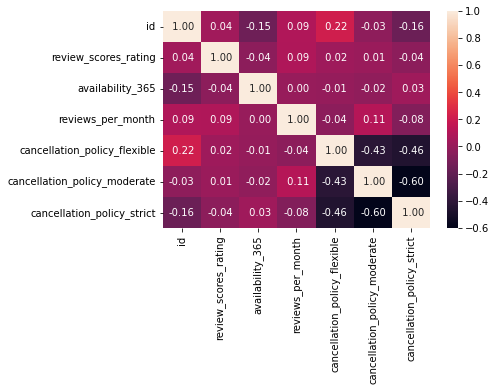

In [23]:
sns.heatmap(Listings3.corr(), annot = True, fmt = " .2f");

#### Plot for reviewing scores

Using Score ratings

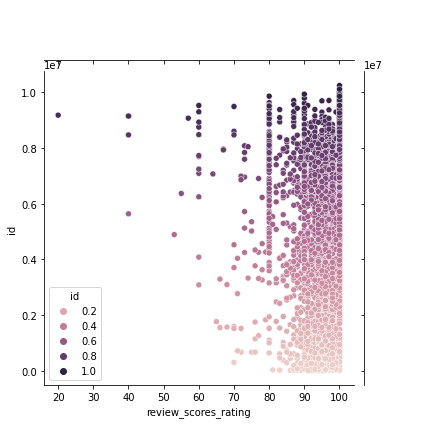

In [43]:
x = Listings2['review_scores_rating']
y = Listings2['id']
sns.jointplot(data=Listings2, x="review_scores_rating", y="id", hue="id")

The data is skewed..Clearly, the id's are clustered together by scores. So, in this case, I wanted to know which Airbnb to choose from based on their score. I would have a group of Airbnbs based on lowest to highest(light pink to dark purple). I didn't want to predict anything but find out which id's had the highest scores. Then I could sort these clusters of airbnb's for marketing purposes and also to further explore why these specfic id's(places) are scoring lower. 

#### Plot based on Id's that have recieved least to most reviews per month

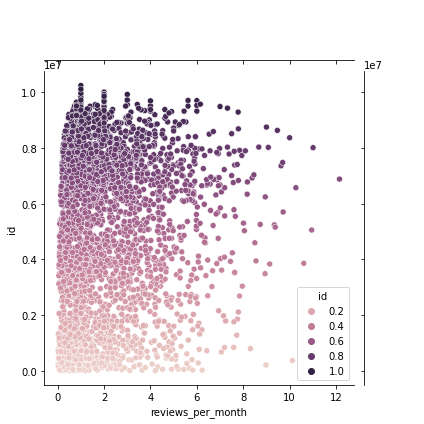

In [48]:
x = Listings['reviews_per_month']
y = Listings['id']
sns.jointplot(data=Listings2, x="reviews_per_month", y="id", hue="id")